<a href="https://www.kaggle.com/code/muzaheed/segmentation-msrdailyactivity3d?scriptVersionId=248133623" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-10.3.

In [2]:
import os

DATASET_DIR = "/kaggle/input/msrdailyactivity3d-rgb-videos-only/MSRDailyAction3D"


CLASSES = os.listdir(DATASET_DIR)
NO_OF_CLASSES = 5
CLASSES = CLASSES[:NO_OF_CLASSES]

In [3]:
video_path = "/kaggle/input/msrdailyactivity3d-rgb-videos-only/MSRDailyAction3D/call cellphone/a04_s01_e01_rgb.avi"

In [4]:
from ultralytics import YOLO

# Load the pre-trained YOLOv8 segmentation model
model = YOLO("yolov8n-seg.pt")  # Use 'yolov8s-seg.pt' for a larger model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.74M/6.74M [00:00<00:00, 87.6MB/s]



0: 480x640 1 person, 1 bench, 1 chair, 48.5ms
Speed: 5.8ms preprocess, 48.5ms inference, 284.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 couch, 1 remote, 8.8ms
Speed: 2.7ms preprocess, 8.8ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 couch, 8.0ms
Speed: 2.2ms preprocess, 8.0ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 couch, 1 remote, 8.0ms
Speed: 2.6ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 couch, 1 remote, 8.0ms
Speed: 2.2ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 couch, 1 remote, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 couch, 8.1ms
Speed: 2.2ms preprocess, 8.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480

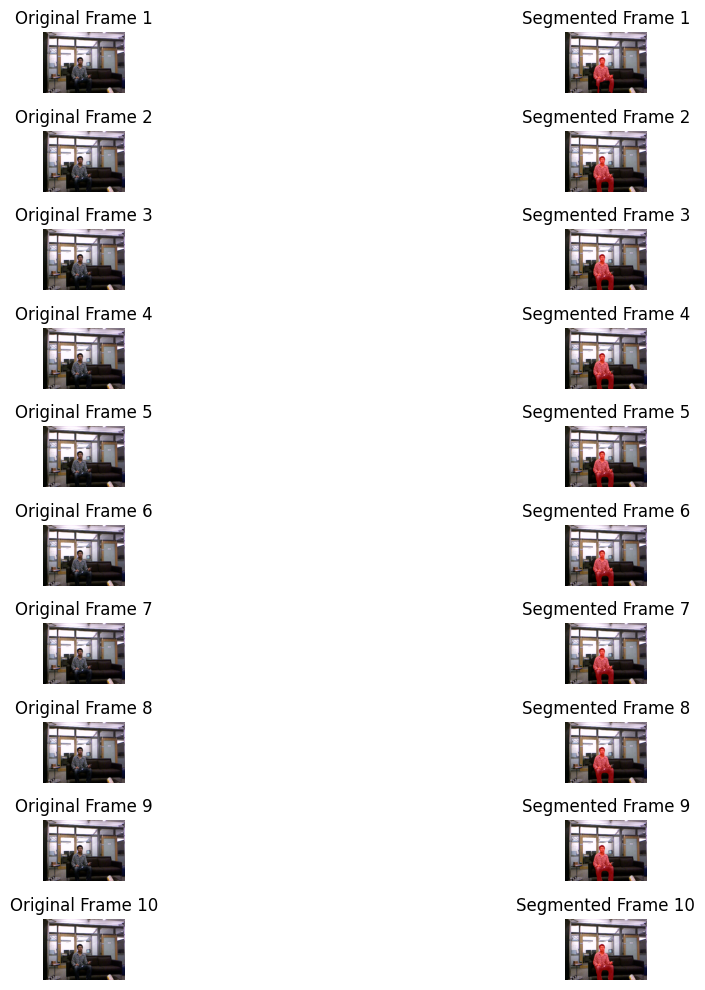

In [5]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the pre-trained YOLOv8 segmentation model
model = YOLO("yolov8n-seg.pt")  # Use 'yolov8s-seg.pt' for better accuracy

# Load the video
cap = cv2.VideoCapture(video_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Process only 10 frames
frame_count = 0
max_frames = 10
frames = []
segmented_frames = []

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Perform inference on the frame
    results = model(frame)
    
    # Process results
    segmented_frame = frame.copy()
    for result in results:
        if result.masks is not None:  # Check if segmentation masks are available
            for mask, box in zip(result.masks.data, result.boxes):
                if int(box.cls) == 0:  # Class 0 is 'person' in COCO dataset
                    # Convert mask to binary
                    mask = mask.cpu().numpy().astype(np.uint8) * 255
                    mask = cv2.resize(mask, (width, height))
                    
                    # Create a colored mask (red for humans)
                    colored_mask = np.zeros_like(frame)
                    colored_mask[:, :, 2] = mask  # Red channel
                    
                    # Overlay the mask on the frame
                    segmented_frame = cv2.addWeighted(segmented_frame, 1, colored_mask, 0.5, 0)
    
    # Store frames
    frames.append(frame)
    segmented_frames.append(segmented_frame)
    frame_count += 1

# Release video capture
cap.release()

# Display original and segmented frames using Matplotlib
plt.figure(figsize=(15, 10))
for i in range(len(frames)):
    # Original frame
    plt.subplot(max_frames, 2, 2 * i + 1)
    plt.imshow(cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Original Frame {i+1}")
    plt.axis("off")
    
    # Segmented frame
    plt.subplot(max_frames, 2, 2 * i + 2)
    plt.imshow(cv2.cvtColor(segmented_frames[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Segmented Frame {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()


0: 480x640 1 person, 8.7ms
Speed: 1.2ms preprocess, 8.7ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 couch, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 couch, 8.3ms
Speed: 1.3ms preprocess, 8.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 couch, 2 sinks, 8.3ms
Speed: 1.5ms preprocess, 8.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 couch, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 couch, 8.3ms
Speed: 1.5ms preprocess, 8.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 couch, 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 couch, 1 sink, 8.1ms
Speed: 1.5ms preprocess,

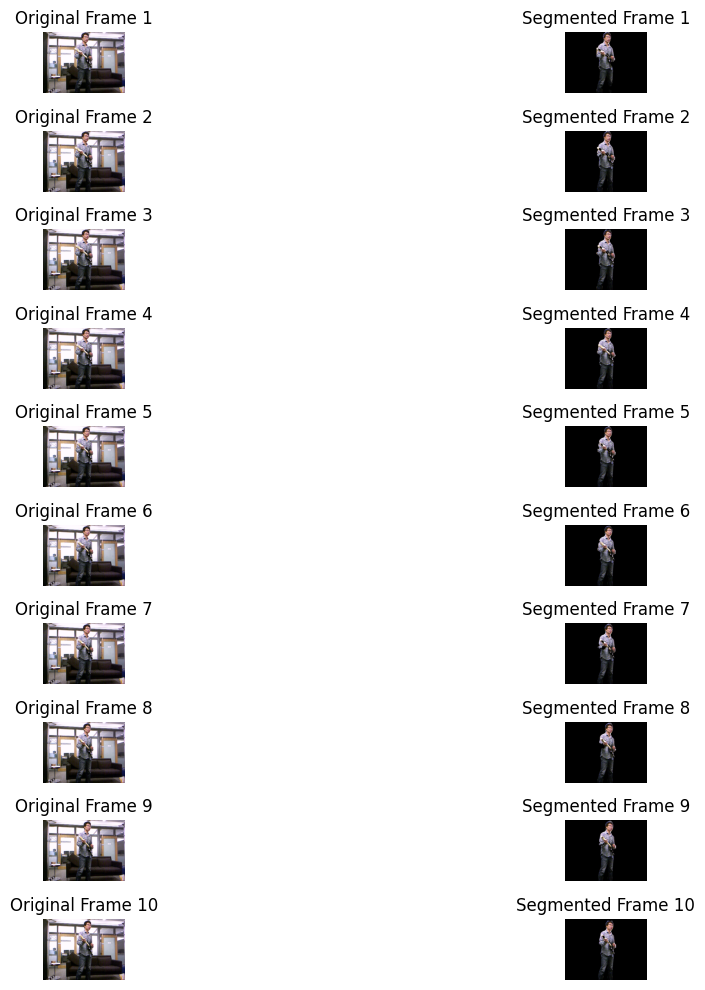

In [6]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the pre-trained YOLOv8 segmentation model
model = YOLO("yolov8n-seg.pt")  # Use 'yolov8s-seg.pt' for better accuracy
video_path = "/kaggle/input/msrdailyactivity3d-rgb-videos-only/MSRDailyAction3D/play guitar/a14_s01_e02_rgb.avi"
# Load the video
cap = cv2.VideoCapture(video_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Process only 10 frames
frame_count = 0
max_frames = 10
frames = []
segmented_frames = []

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Perform inference on the frame
    results = model(frame)
    
    # Create a black background
    segmented_frame = np.zeros_like(frame)
    
    # Process results
    for result in results:
        if result.masks is not None:  # Check if segmentation masks are available
            for mask, box in zip(result.masks.data, result.boxes):
                if int(box.cls) == 0:  # Class 0 is 'person' in COCO dataset
                    # Convert mask to binary
                    mask = mask.cpu().numpy().astype(np.uint8)
                    mask = cv2.resize(mask, (width, height))
                    
                    # Extract the human region from the original frame
                    human_region = cv2.bitwise_and(frame, frame, mask=mask)
                    
                    # Add the human region to the black background
                    segmented_frame = cv2.bitwise_or(segmented_frame, human_region)
    
    # Store frames
    frames.append(frame)
    segmented_frames.append(segmented_frame)
    frame_count += 1

# Release video capture
cap.release()

# Display original and segmented frames using Matplotlib
plt.figure(figsize=(15, 10))
for i in range(len(frames)):
    # Original frame
    plt.subplot(max_frames, 2, 2 * i + 1)
    plt.imshow(cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Original Frame {i+1}")
    plt.axis("off")
    
    # Segmented frame (humans on black background)
    plt.subplot(max_frames, 2, 2 * i + 2)
    plt.imshow(cv2.cvtColor(segmented_frames[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Segmented Frame {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()